## Book Recommendation System

### Table of Contents 
- Import data and libraries 💻 
- Exploratory Data Analysis 📊 
    - Number of Books Published Per Year 
    - Top 15 Publishers by Book Count 
    - Top 15 Authors by Book Count
    - Books Count by Rating  
    - Top 10 Most Rated Books By Users
- Model 
    - Item-based Collaborative Filtering  
    - User-based Collaborative Filtering 

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.1 Books Data

In [2]:
df_books = pd.read_csv('Books.csv')
df_books.head(5)

/var/folders/9w/h_t_pkw53172wjg0ttykhb5h0000gn/T/ipykernel_35222/4107897335.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
print(df_books.shape)

(271360, 8)


In [4]:
# remove the unnecessary columns (Image-URL)
df_books = df_books.iloc[:,:5]
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [5]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [6]:
# change the type from object to int for Year-of-Publication  
# when changing the type we found out there is 'DK Publishing Inc' in Year-Of-Publication 

# df_books['Year-Of-Publication']  = df_books['Year-Of-Publication'].astype(int)
df_books[df_books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [7]:
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'],errors='coerce')
df_books = df_books.dropna()

In [8]:
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)

In [9]:
# check for null value
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [10]:
# check for duplicate 
df_books.duplicated().sum()

0

#### 1.2 User Data

In [11]:
df_user = pd.read_csv('Users.csv')
df_user.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
# Extract country from the location column
df_user['Location'] = df_user['Location'].apply(lambda x: x.split(',')[-1].strip())

In [13]:
df_user.head()

,User-ID,Location,Age
0,1,usa,NaN
1,2,usa,18.0
2,3,russia,NaN
3,4,portugal,17.0
4,5,united kingdom,NaN


In [14]:
print(df_user.shape)

(278858, 3)


In [15]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
# check for null value
# we will not be using the age column for collabarative filtering 
df_user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
df_user.duplicated().sum()

0

#### 1.3 Rating Data

In [18]:
df_rating = pd.read_csv('Ratings.csv')
df_rating.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [20]:
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [21]:
df_rating.duplicated().sum()

0

### 2. Exploratory Data Analysis

#### 2.1 Number of Books Published per Year 

In [22]:
# Extract unique years
unique_years = np.sort(df_books['Year-Of-Publication'].unique())[::-1]
print(unique_years)

[2050 2038 2037 2030 2026 2024 2021 2020 2012 2011 2010 2008 2006 2005
 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991
 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980 1979 1978 1977
 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965 1964 1963
 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949
 1948 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935
 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921
 1920 1919 1917 1914 1911 1910 1909 1908 1906 1904 1902 1901 1900 1897
 1806 1378 1376    0]


By looking at the unique year list, we notice that there is 0 and future year like 2024 to 2050. We will exclude these in our dataset since it does not make sense to include 0 year and future year as these books aren't avaliable for people to read and to review it. Also, we will only include from year 1980 to year 2012, since from 2012 there is a huge missing gap between 2012 to 2020. 

In [23]:
# filter out years that are greater than 2022 and years that are smaller than 1990 
df_books = df_books.loc[
    (df_books['Year-Of-Publication'] <= 2012) &
    (df_books['Year-Of-Publication'] >= 1980)]

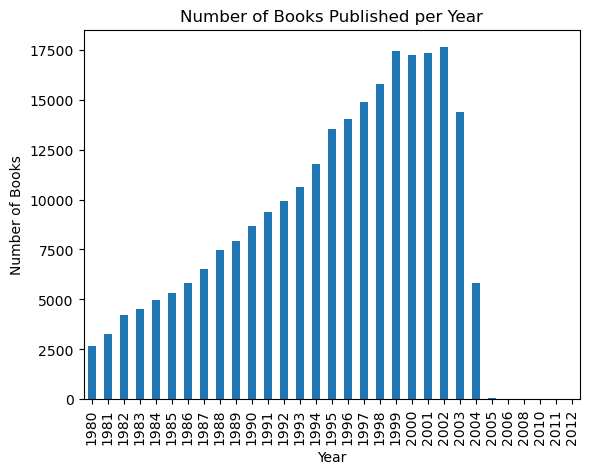

In [24]:
# Number of Books Published per Year 
year_counts = df_books.groupby('Year-Of-Publication').size() 

# Plot the graph 
year_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.title("Number of Books Published per Year")
plt.show()


As you can see from the graph, the years 1998 to 2002 are the years in which most books were published. 

#### 2.2 Top 15 Publishers by Book Count 

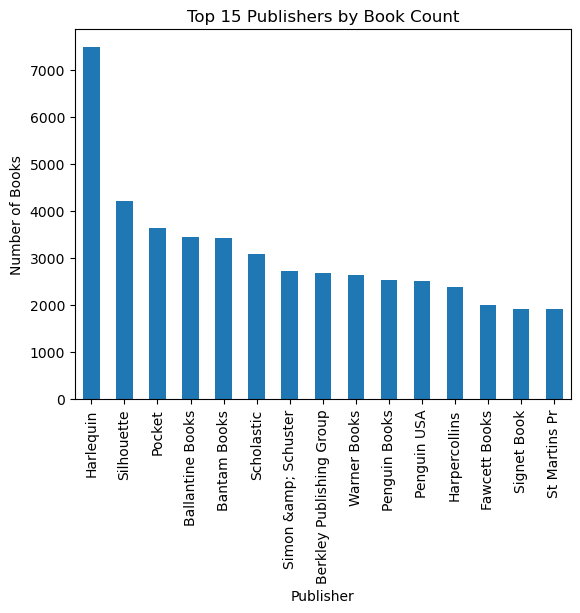

In [25]:
top_publishers = df_books['Publisher'].value_counts().head(15)

# Plot the graph 
top_publishers.plot(kind='bar')
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.title("Top 15 Publishers by Book Count")
plt.show()

Harlequin has published the most books with over 7000 books. Followed by Silhouette with approximately 4000 books and the third publisher is Pocket with approximately 3900 books. 

#### 2.3 Top 15 Authors by Book Count

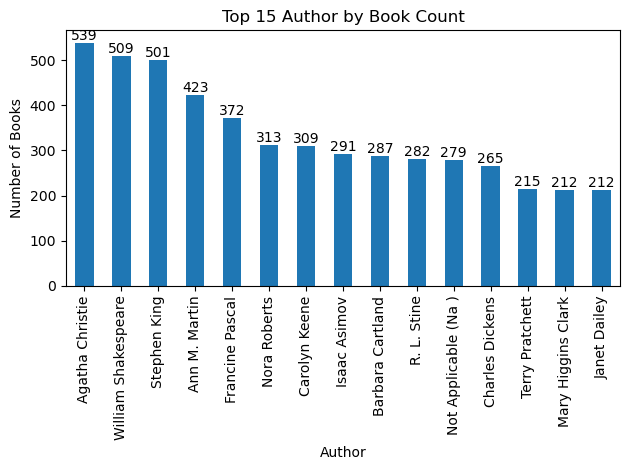

In [26]:
top_authors = df_books['Book-Author'].value_counts().head(15)

# Plot the graph 
fig, ax = plt.subplots()
top_authors.plot(kind='bar')
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.title("Top 15 Author by Book Count")

# Display count values on top of each bar
for i, count in enumerate(top_authors):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Agatha Christie has authored the most books with 539 books. Followed by William Shakespeare with 509 books and the third author is Stephen King with 501 books. 

In [27]:
# merged books with rating 
br = pd.merge(df_books, df_rating, on='ISBN')
br.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


#### 2.4 Books Count by Rating 

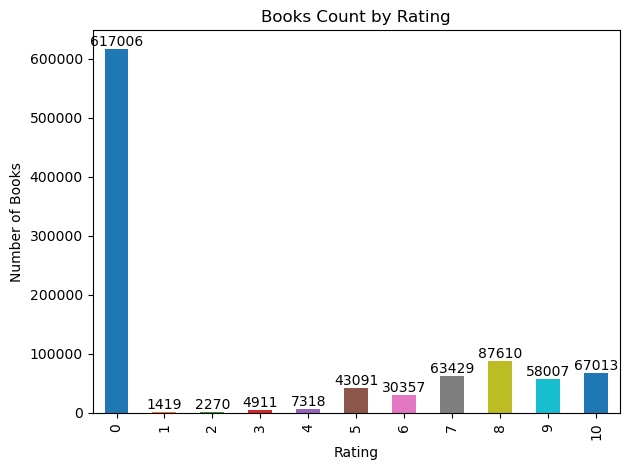

In [28]:
# Group by rating and count books in each rating
rating_counts = br['Book-Rating'].value_counts().sort_index()

# Plotting the bar chart
fig, ax = plt.subplots()
rating_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                      '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], ax=ax)
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.title("Books Count by Rating")

# Display count values on top of each bar
for i, count in enumerate(rating_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

0 rating has the highest books count with 617006 books.  

In [29]:
# merged books with rating and users 
complete_df = br.merge(df_user.drop("Age", axis=1), on='User-ID')
complete_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,canada


#### 2.5 Top 10 most rated books by users

In [30]:
top20 = complete_df['Book-Title'].value_counts().head(20)
top20 = list(top20.index)

top20_books = pd.DataFrame(columns=br.columns)

for book in top20:
    cond_df = br[br['Book-Title'] == book]
    top20_books = pd.concat([top20_books, cond_df], axis=0)

top20_books = top20_books[top20_books['Book-Rating'] != 0]
top20_books = top20_books.groupby('Book-Title')['Book-Rating'].mean().reset_index().sort_values(by='Book-Rating', ascending=False)

top10_books = top20_books.head(10)
top10_books

,Book-Title,Book-Rating
4,Harry Potter and the Sorcerer's Stone (Harry P...,8.936508
15,The Secret Life of Bees,8.477833
8,The Da Vinci Code,8.439271
10,The Lovely Bones: A Novel,8.185290
14,The Red Tent (Bestselling Backlist),8.182768
18,Where the Heart Is (Oprah's Book Club (Paperba...,8.142373
6,Life of Pi,8.080357
1,Angels &amp; Demons,8.016129
12,The Notebook,7.897611
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,7.876161


### 3. Building Recommendation Model

We can further clean our data before running the model. 

1. From the EDA, we notice that there are zero rating books, therefore we will remove those since they are not being rated by users. 

2. To ensure our dataset is credible, a book that receives high ratings but has only been rated by one or two users lacks credibility. Therefore, we will only include books with more than 20 ratings. 

3. On the other hand, a user who has only rated one or two books is not considered a credible user. Therefore, we will only include those users who have given ratings to more than 50 books. 

In [31]:
# Removing books with zero ratings from the dataset 

complete_df = complete_df[complete_df["Book-Rating"]>0]
complete_df["Book-Rating"].describe()

count    365425.000000
mean          7.620270
std           1.839983
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [32]:
# keep only those users who have given ratings to more than 50 books 
credible_user = complete_df['User-ID'].value_counts()
credible_user = credible_user[credible_user > 50].index 

complete_df = complete_df[complete_df['User-ID'].isin(credible_user)]

In [33]:
# keep only books with more than 20 ratings 
credible_book = complete_df['Book-Title'].value_counts()
credible_book = credible_book[credible_book > 20].index

complete_df = complete_df[complete_df['Book-Title'].isin(credible_book)]

In [34]:
complete_df.shape

(14624, 8)

#### 3.1 Item-based Collaborative Filtering 

In [35]:
from sklearn.metrics.pairwise import cosine_similarity 
from scipy import sparse

In [36]:
# pivoting the data 
item_matrix = complete_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
item_matrix 

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2977,...,273113,273718,274004,274061,274301,275970,276680,277427,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,9.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Case of Need,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wuthering Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year of Wonders,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Replace the NaN value with zeros
item_matrix .fillna(0,inplace=True)
item_matrix 

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2977,...,273113,273718,274004,274061,274301,275970,276680,277427,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
similarity_score = cosine_similarity(item_matrix)

In [39]:
def recommend(book_name):
    index = np.where(item_matrix.index==book_name)[0][0]

    # Find similar books based on the similarity score 
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = complete_df[complete_df['Book-Title'] == item_matrix.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        data.append(item)
    return data

#### Recommend 5 books to users who have read The Secret Lift of Bees 

In [40]:
recommend("The Secret Life of Bees")

[['Good in Bed', 'Jennifer Weiner'],
 ['Wicked: The Life and Times of the Wicked Witch of the West',
  'Gregory Maguire'],
 ['The Rapture of Canaan', 'Sheri Reynolds'],
 ['Girl in Hyacinth Blue', 'Susan Vreeland'],
 ['The Da Vinci Code', 'Dan Brown']]

#### Recommend 5 books to users who have read The Notebook

In [41]:
recommend("The Notebook")

[['The Rescue', 'Nicholas Sparks'],
 ['A Walk to Remember', 'Nicholas Sparks'],
 ['The Five People You Meet in Heaven', 'Mitch Albom'],
 ["Suzanne's Diary for Nicholas", 'James Patterson'],
 ['Message in a Bottle', 'Nicholas Sparks']]

#### Recommend 5 books to users who have read 1984

In [42]:
recommend("1984")

[['Animal Farm', 'George Orwell'],
 ['Brave New World', 'Aldous Huxley'],
 ["The Handmaid's Tale", 'Margaret Atwood'],
 ['The Catcher in the Rye', 'J.D. Salinger'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)', 'ANNE RICE']]

#### 3.2 User-based Collaborative Filtering

In [43]:
# filter out the zero rating 
br = br[br["Book-Rating"] > 0]
br["Book-Rating"].value_counts()

8     87610
10    67013
7     63429
9     58007
5     43091
6     30357
4      7318
3      4911
2      2270
1      1419
Name: Book-Rating, dtype: int64

In [44]:
br["Book-Title"].value_counts()

The Lovely Bones: A Novel                                      707
Wild Animus                                                    581
The Da Vinci Code                                              494
The Secret Life of Bees                                        406
The Nanny Diaries: A Novel                                     393
                                                              ... 
A Traveller's History of London (Travellers History Series)      1
Easy Japanese                                                    1
Temptation (Penguin Graphic Fiction)                             1
Raven in Amber                                                   1
From One to One Hundred                                          1
Name: Book-Title, Length: 127171, dtype: int64

In [45]:
rating_counts = pd.DataFrame(br["Book-Title"].value_counts())

In [46]:
# find out rare books and common books 
# rare_book, where the total rating count less than 100 

rare_books = rating_counts[rating_counts["Book-Title"] < 100].index

# select common books by excluding rare books from the dataset 
common_books = br[~br["Book-Title"].isin(rare_books)]
common_books["Book-Title"].value_counts()

The Lovely Bones: A Novel                                                                                                                                       707
Wild Animus                                                                                                                                                     581
The Da Vinci Code                                                                                                                                               494
The Secret Life of Bees                                                                                                                                         406
The Nanny Diaries: A Novel                                                                                                                                      393
                                                                                                                                                               ... 
Don't Sweat the 

In [47]:
common_books["User-ID"].value_counts()

11676     220
16795      78
95359      60
60244      45
240567     41
         ... 
214826      1
215325      1
238238      1
239041      1
169893      1
Name: User-ID, Length: 16498, dtype: int64

In [48]:
# eliminating those who rate the book under 10
common_books = common_books[common_books["User-ID"].map(common_books["User-ID"].value_counts()) >= 10]
common_books["User-ID"].value_counts()

11676     220
16795      78
95359      60
60244      45
240567     41
         ... 
120908     10
269566     10
75149      10
32773      10
7915       10
Name: User-ID, Length: 418, dtype: int64

In [49]:
# creating user matrix
user_matrix = common_books.pivot_table(index=["User-ID"],columns=["Book-Title"], values="Book-Rating")


In [50]:
# randomly select a user from the user_book_df 
user = 136382

In [51]:
# list out all the books by random user 
random_user = user_matrix[user_matrix.index == user]
random_user

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Violets Are Blue,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
136382,NaN,8.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# find out books that random user has rated 
books_rated = random_user.columns[random_user.notna().any()].tolist()
books_rated

['1st to Die: A Novel',
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 'Back Roads',
 'Dreamcatcher',
 'Four To Score (A Stephanie Plum Novel)',
 'Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)',
 'Midwives: A Novel',
 'Seven Up (A Stephanie Plum Novel)',
 'Skipping Christmas',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'The Poisonwood Bible: A Novel',
 'The Rainmaker',
 'The Rescue',
 'The Runaway Jury',
 'The Street Lawyer']

In [53]:
len(books_rated) 

15

In [54]:
books_rated_df = user_matrix[books_rated] 
books_rated_df

Book-Title,1st to Die: A Novel,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),Back Roads,Dreamcatcher,Four To Score (A Stephanie Plum Novel),Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel),Midwives: A Novel,Seven Up (A Stephanie Plum Novel),Skipping Christmas,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",The Poisonwood Bible: A Novel,The Rainmaker,The Rescue,The Runaway Jury,The Street Lawyer
User-ID,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,9.0,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274301,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276050,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN


In [55]:
user_book_count = books_rated_df.T.notnull().sum()
user_book_count

User-ID
254       1
638       2
4017      0
6242      0
6251      1
         ..
274004    0
274301    1
276050    2
276165    0
276231    0
Length: 418, dtype: int64

In [56]:
# calculate how many books each user rate, we only want to keep the user that have at least 5 books 
user_book_count = user_book_count.reset_index()  
user_book_count.columns = ["User_id", "book_count"] 
user_book_count.sort_values("book_count", ascending=False)

,User_id,book_count
202,136382,15
18,11676,13
24,16795,10
154,104636,8
384,258534,6
...,...,...
193,129716,0
196,133689,0
198,133747,0
206,138578,0


In [57]:
# filter user that has book count greater than 5 
users_book = user_book_count[user_book_count["book_count"] > 5]["User_id"] 
users_book

18      11676
24      16795
154    104636
202    136382
384    258534
Name: User_id, dtype: int64

In [58]:
# merged data of other users with the random user
final_df = pd.concat([books_rated_df[books_rated_df.index.isin(users_book)],random_user[books_rated]])

In [59]:
# find the correlation for all user 

corr = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr = pd.DataFrame(corr_df, columns=["corr"])
corr.index.names = ['user_id_1', 'user_id_2']
corr = corr.reset_index()
similar_users = corr_df[(corr_df["user_id_1"] == user)][["user_id_2", "corr"]].reset_index(drop=True)
similar_users

,user_id_2,corr
0,258534,-0.241191
1,16795,0.750373
2,136382,1.000000


In [60]:
# filter user that has above 0.7 correlation (high correlation) 

similar_users = corr_df[(corr_df["user_id_1"] == user) & (corr_df["corr"] >  0.70)][["user_id_2", "corr"]].reset_index(drop=True)

similar_users = similar_users.sort_values(by='corr', ascending=False)
similar_users.rename(columns={"user_id_2": "User-ID"}, inplace=True)
similar_users

,User-ID,corr
1,136382,1.000000
0,16795,0.750373


we found out that user-id = 16795 has high correlation with our user = 136382 with 0.75.

In [61]:
# merge our rating dataset to find the books from user = 16795 

similar_users_rating = similar_users.merge(df_rating[["User-ID", "ISBN", "Book-Rating"]], how='inner') 
similar_users_rating = similar_users_ratings[similar_users_rating["User-ID"] != user]
similar_users_rating

,User-ID,corr,ISBN,Book-Rating
437,16795,0.750373,0006093090X,8
438,16795,0.750373,000670891576,8
439,16795,0.750373,0020280505,8
440,16795,0.750373,0020419805,8
441,16795,0.750373,002517990X,6
...,...,...,...,...
3380,16795,0.750373,1890627062,0
3381,16795,0.750373,1930408048,0
3382,16795,0.750373,1930722028,0
3383,16795,0.750373,9994438859,0


In [62]:
# calculate the weighted rating 
similar_users_rating['weighted_rating'] = similar_users_rating['corr'] * similar_users_rating['Book-Rating']
similar_users_rating

,User-ID,corr,ISBN,Book-Rating,weighted_rating
437,16795,0.750373,0006093090X,8,6.002985
438,16795,0.750373,000670891576,8,6.002985
439,16795,0.750373,0020280505,8,6.002985
440,16795,0.750373,0020419805,8,6.002985
441,16795,0.750373,002517990X,6,4.502239
...,...,...,...,...,...
3380,16795,0.750373,1890627062,0,0.000000
3381,16795,0.750373,1930408048,0,0.000000
3382,16795,0.750373,1930722028,0,0.000000
3383,16795,0.750373,9994438859,0,0.000000


In [63]:
final_recommendation = similar_users_rating.groupby('ISBN').agg({"weighted_rating": "mean"})
final_recommendation = final_recommendation.reset_index()
final_recommendation

,ISBN,weighted_rating
0,0006093090X,6.002985
1,000670891576,6.002985
2,0020280505,6.002985
3,0020419805,6.002985
4,002517990X,4.502239
...,...,...
2943,1890627062,0.000000
2944,1930408048,0.000000
2945,1930722028,0.000000
2946,9994438859,0.000000


In [67]:
# filter the weighted rating greater than 6.5 since we only want to keep the books that has higher weighted rating 

final_recommendation = final_recommendation[final_recommendation["weighted_rating"] > 6.5].sort_values("weighted_rating", ascending=False).head(10)
final_recommendation

,ISBN,weighted_rating
1624,0515120898,7.503732
1669,0525945210,7.503732
558,0345423097,7.503732
2653,0866852611,7.503732
1623,051511992X,7.503732
811,0375412824,7.503732
1607,0515102636,7.503732
2521,0811801802,7.503732
2506,0805061762,7.503732
2195,0684842327,7.503732


In [65]:
final_recommendation.merge(br[["ISBN", "Book-Title"]]).drop_duplicates()

,ISBN,weighted_rating,Book-Title
0,0515120898,7.503732,The Pull of the Moon
25,0525945210,7.503732,A Man Named Dave: A Story of Triumph and Forgi...
45,0345423097,7.503732,Joy School (Ballantine Reader's Circle)
67,0866852611,7.503732,Love Story (Arabic)
68,051511992X,7.503732,That Camden Summer
103,0375412824,7.503732,The Dive From Clausen's Pier (Alex Awards)
158,0515102636,7.503732,Morning Glory
184,0811801802,7.503732,Sabine's Notebook: In Which the Extraordinary ...
217,0805061762,7.503732,"A Gentle Madness : Bibliophiles, Bibliomanes, ..."
222,0684842327,7.503732,NEEDLES : A MEMOIR OF GROWING UP WITH DIABETES
